In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import re

import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#Read the financial JPMorgan dataset
file_path ="fraud_payment_dataJPmorgan.csv"
jp_df = pd.read_csv(file_path)

# 1. Explore Data and Handle Missing Values

In [3]:
jp_df

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498172,2054-09-14 13:17:24,PAY-BILL-2180018,JPMC-CLIENT-2179746,ACCOUNT-2179757,USA,24701.0,CCB,BILL-COMPANY-2179895,ACCOUNT-2179896,USA,159.64,0,MAKE-PAYMENT
1498173,2054-09-15 00:57:24,QUICK-PAYMENT-2181421,JPMC-CLIENT-2181147,ACCOUNT-2181158,USA,4953.0,CCB,CLIENT-2181279,ACCOUNT-2181280,USA,120.07,0,QUICK-PAYMENT
1498174,2054-09-15 01:17:24,PAYMENT-2180021,JPMC-CLIENT-2179746,ACCOUNT-2179757,USA,34784.0,CCB,BILL-COMPANY-2180022,ACCOUNT-2180023,USA,25.32,0,MAKE-PAYMENT
1498175,2054-09-15 12:57:24,QUICK-PAYMENT-2181422,JPMC-CLIENT-2181147,ACCOUNT-2181158,USA,23822.0,CCB,CLIENT-2181279,ACCOUNT-2181280,USA,610.91,0,QUICK-PAYMENT


In [74]:
#statistic summary for numerical variable
jp_df["USD_amount"].describe()


count    1.498177e+06
mean     5.134698e+02
std      5.398089e+02
min      0.000000e+00
25%      1.386900e+02
50%      4.041600e+02
75%      7.340700e+02
max      1.999894e+04
Name: USD_amount, dtype: float64

In [77]:
# statistic summary for category variables.
jp_df.loc[:,~jp_df.columns.isin(['Time_step','USD_amount','Label','Sender_lob','Sender_Sector'])].describe(include = "all")

,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Bene_Id,Bene_Account,Bene_Country,Transaction_Type
count,1498177,1279291,1279291,1279291,1282284,1282284,1282284,1498177
unique,1498177,59071,75161,252,279357,295031,252,8
top,DEPOSIT-CASH-1317086,JPMC-CLIENT-1730807,ACCOUNT-1591424,USA,JPMC-CLIENT-1119942,ACCOUNT-1029621,USA,MAKE-PAYMENT
freq,1,157,99,997236,80,61,757908,557735


In [3]:
jp_df.Sender_lob.value_counts(dropna=False)

CCB    1279291
NaN     218886
Name: Sender_lob, dtype: int64

###     1.1. Count the number of fraud and non-fraud labels in datatset

<BarContainer object of 2 artists>

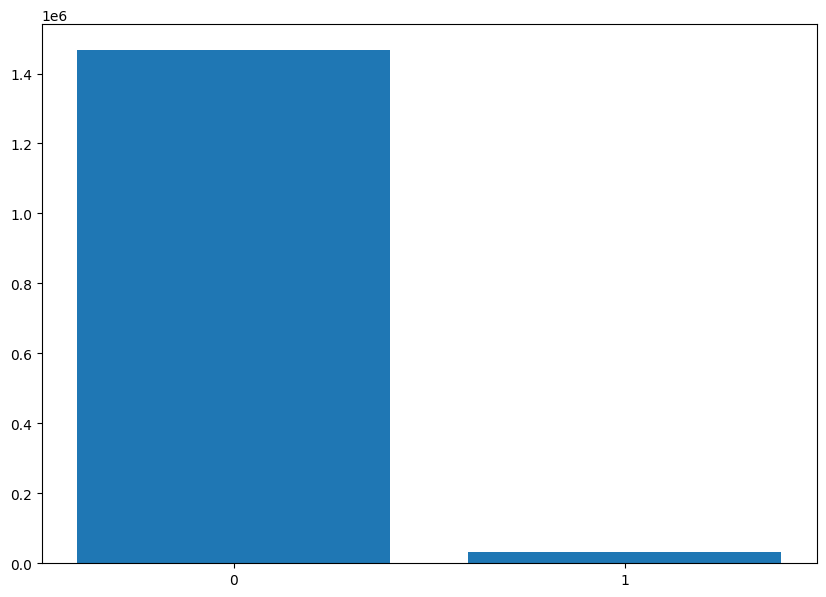

In [78]:
figure = plt.figure(figsize=(10,7))

plt.bar(['0','1'], jp_df['Label'].value_counts().values
)


Figure 1. Labels 

In [10]:
jp_df['Label'].value_counts()


0    1467358
1      30819
Name: Label, dtype: int64

There are 1,467,358 transactions labeled as Non-Fraud and 30,819 labeled as fraud


### 1.2. Explore and Handle the missing values

In [11]:
jp_df.isnull().sum()

Time_step                0
Transaction_Id           0
Sender_Id           218886
Sender_Account      218886
Sender_Country      218886
Sender_Sector       218886
Sender_lob          218886
Bene_Id             215893
Bene_Account        215893
Bene_Country        215893
USD_amount               0
Label                    0
Transaction_Type         0
dtype: int64

In [12]:
# There are 218886 missing values at columns Sender_Id, Sender_Account, Sender_Country, Sender_Sector and Sender_lob
# There are 215893 missing values at columns Bene_Id, Bene_Account, Bene_Country

            Missing Values for each column

In [13]:
#b. Explore the missing values in JPmorgan dataset
#sns.heatmap(jp_df.isna().transpose(),
            #cmap="YlGnBu",
            #cbar_kws={'label': 'Missing Data'})

                    Figure 2. Missing Values Exploration

Looking at the Figure 2 above, we can see that Sender_Id, Sender_Account, Sender_Country, Sender_Sector, and Sender_Job are all missing values together. We call all of this columns as Sender-related column. Also, Bene_Id, Bene_Account, and Bene_Country are all missing values together. We call these columns as a group of Bene-related column.

Since they are all missing together, there might be a logical reason for this missing. We will investigate for this missing below. 

In [14]:
# Since all the Sender-related columns all have missing values, we only need to consider Sender_Country
#column that would be representative for all these columns.
jp_df[jp_df["Sender_Country"].isnull()].Transaction_Type.value_counts()

DEPOSIT-CHECK    109477
DEPOSIT-CASH     109409
Name: Transaction_Type, dtype: int64

Given Sender-realted Columns have missing values, there are 109477 DEPOSIT-CHECK and 109409 DEPOSIT-CASH

In [15]:

print(jp_df[jp_df["Transaction_Type"] == "DEPOSIT-CHECK"].Transaction_Type.value_counts())
print(jp_df[jp_df["Transaction_Type"] == "DEPOSIT-CASH"].Transaction_Type.value_counts())


DEPOSIT-CHECK    109477
Name: Transaction_Type, dtype: int64
DEPOSIT-CASH    109409
Name: Transaction_Type, dtype: int64


        Given the whole datasets, there are also 109477 DEPOSIT-CHECK and 109409 DEPOSIT-CASH. It means for the transaction type is either deposit check or deposit cash, we don't need the Sender-related columns because whenever a person deposite cash or check, they basically send the money for themself. 
    Therefore, for the transaction type of DEPOSIT-CHECK AND DEPOSIT-CASH, the values from the sender-related columns are same as those in the Bene-related columns.  

In [16]:
jp_df[jp_df["Bene_Country"].isnull()].Transaction_Type.value_counts()


EXCHANGE      108167
WITHDRAWAL    107726
Name: Transaction_Type, dtype: int64

Given Bene-realted Columns have missing values, there are 108167 EXCHANGE and 107726 WITHDRAWAL

In [17]:
print(jp_df[jp_df["Transaction_Type"] == "EXCHANGE"].Transaction_Type.value_counts())
print(jp_df[jp_df["Transaction_Type"] == "WITHDRAWAL"].Transaction_Type.value_counts())


EXCHANGE    108167
Name: Transaction_Type, dtype: int64
WITHDRAWAL    107726
Name: Transaction_Type, dtype: int64


     
     Given the whole datasets, there are also 10816 EXCHANGE and 107726 WITHDRAWAL . It means for the transaction type that is either Withdrawal or exchange, we don't need the Sender-related columns because whenever a person withdraw or make the exchange, one does it for themself. 
     
     Therefore, for the transaction type of EXCHANGE AND WITHDRAWAL, the values from the Bene-related columns are same as those in the Sender-related columns


    In conclusion, for the trsaction type of exchange and withdrawal, the missing values in the Sender-related columns are replaced with the same values of the same rows at Bene-related columns. And for the transaction type of DEPOSIT-CHECK and DEPOSIT-CASH, the missing values in the Bene-related columns are replaced with the same values in its same rows at the Sender-related columns.

### 1.2.1.Replace missing values for Sender_Id and Sender_country columns

In [4]:
#create a copy of dataframe and replace the Missing values with other values on this copy 
jp_df_copy1 = jp_df.copy()

In [5]:
#replace the missing values of sender_id with values of Bene_id in the same row 
# and add the word "self" to our value to indicate the transaction is oneself
beneIdvalues = jp_df[jp_df["Sender_Id"].isnull()].Bene_Id + "-" + "self"
jp_df_copy1.loc[jp_df["Sender_Id"].isnull(),["Sender_Id"]] = beneIdvalues
jp_df_copy1.loc[jp_df_copy1["Sender_Id"].isnull(),["Sender_Id"]]


,Sender_Id


In [6]:
#replace the missing values of sender_country with values of Bene_country in the same row
#  and add the word "self" to our value to indicate the transaction is oneself
bene_country_values = jp_df[jp_df["Sender_Country"].isnull()].Bene_Country + "-" +"self"
jp_df_copy1.loc[jp_df["Sender_Country"].isnull(),["Sender_Country"]] = bene_country_values
jp_df_copy1.loc[jp_df_copy1["Sender_Country"].isnull(),["Sender_Country"]]

,Sender_Country


### 1.2.2. Replace missing values for Bene_Id and Bene_Country columns

In [7]:
#replace the missing values of bene_id with values of sender_id in the same row
#  and add the word "self" to our value to indicate the transaction is oneself
senderIdvalues = jp_df[jp_df["Bene_Id"].isnull()].Sender_Id + "-" + "self"
jp_df_copy1.loc[jp_df["Bene_Id"].isnull(),["Bene_Id"]] = senderIdvalues 
jp_df_copy1.loc[jp_df_copy1["Bene_Id"].isnull(),["Bene_Id"]]

,Bene_Id


In [8]:
#replace the missing values of Bene_country with values of Sender_country in the same row
#  and add the word "self" to our value to indicate the transaction is oneself
sender_country_values = jp_df[jp_df["Bene_Country"].isnull()].Sender_Country + "-" + "self"
jp_df_copy1.loc[jp_df["Bene_Country"].isnull(),["Bene_Country"]] = sender_country_values

jp_df_copy1.loc[jp_df_copy1["Bene_Country"].isnull(),["Bene_Country"]]

,Bene_Country


In [9]:
# we want to make sure both bene-related columns and sender-related columns at transaction type of DEPOSIT CASH, DEPOSIT CHECK, EXCHANGE and WITHDRAW HAVE THE SAME VALUES
jp_df_copy1.loc[jp_df["Sender_Id"].isnull(),["Bene_Id"]] = beneIdvalues
jp_df_copy1.loc[jp_df["Sender_Country"].isnull(),["Bene_Country"]] = bene_country_values
jp_df_copy1.loc[jp_df["Bene_Id"].isnull(),["Sender_Id"]] = senderIdvalues
jp_df_copy1.loc[jp_df["Bene_Country"].isnull(),["Sender_Country"]] = sender_country_values

In [9]:
jp_df_copy1.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098-self,ACCOUNT-10108,USA-self,35537.0,CCB,JPMC-CLIENT-10098-self,NaN,USA-self,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,JPMC-CLIENT-9812-self,NaN,USA-self,NaN,NaN,JPMC-CLIENT-9812-self,ACCOUNT-9826,USA-self,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,JPMC-CLIENT-9789-self,NaN,USA-self,NaN,NaN,JPMC-CLIENT-9789-self,ACCOUNT-9800,USA-self,786.78,0,DEPOSIT-CHECK


In [10]:
jp_df_copy1.isnull().sum()

Time_step                0
Transaction_Id           0
Sender_Id                0
Sender_Account      218886
Sender_Country           0
Sender_Sector       218886
Sender_lob          218886
Bene_Id                  0
Bene_Account        215893
Bene_Country             0
USD_amount               0
Label                    0
Transaction_Type         0
dtype: int64

In [10]:
def assign_countries(value, top_Country):
    for i in top_Country:
        if value == i:
            return value
        else:
            return "other"


# 2. Exploration Data Analysis

### 2.1 Compare the transfer amount between fraud and non-fraud

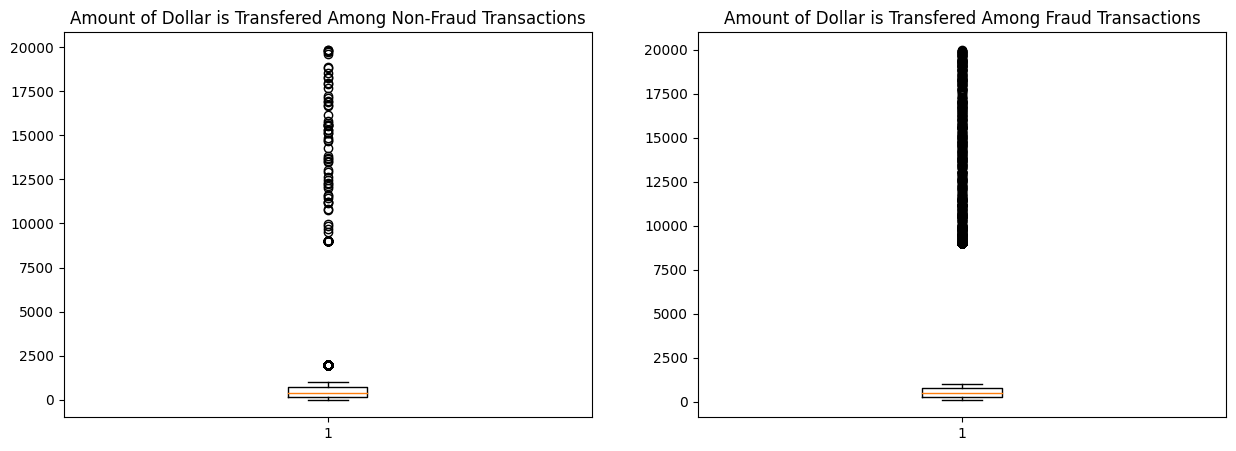

In [66]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax1.boxplot(jp_df_copy1.loc[jp_df_copy1["Label"]==0,["USD_amount"]])
ax1.set_title("Amount of Dollar is Transfered Among Non-Fraud Transactions")
ax2 = fig.add_subplot(1,2,2)
ax2.boxplot(jp_df_copy1.loc[jp_df_copy1["Label"]==1,["USD_amount"]])
ax2.set_title("Amount of Dollar is Transfered Among Fraud Transactions")
plt.show()

The average amount of Fraud Transtraction is higher than non-fraud one. There are many large amount transactions as outliners in fraud transaction range from $9,000 to $20,000.

## 2.2 For fraud type and nonFraud, what percentage of each Bene Country? 



In [14]:
fraud_by_bene_country = jp_df.loc[(jp_df["Label"] == 1),["Bene_Country"]].value_counts(normalize = True).to_frame()

top10beneCountry_fraud = []
for i in list(fraud_by_bene_country.head(10).index):
    top10beneCountry_fraud.append(i[0])


In [15]:
nonfraud_by_bene_country = jp_df.loc[(jp_df["Label"] == 0),["Bene_Country"]].value_counts(normalize = True).to_frame()
top10beneCountry_nonfraud = []
for i in list(nonfraud_by_bene_country.head(10).index):
    top10beneCountry_nonfraud.append(i[0])

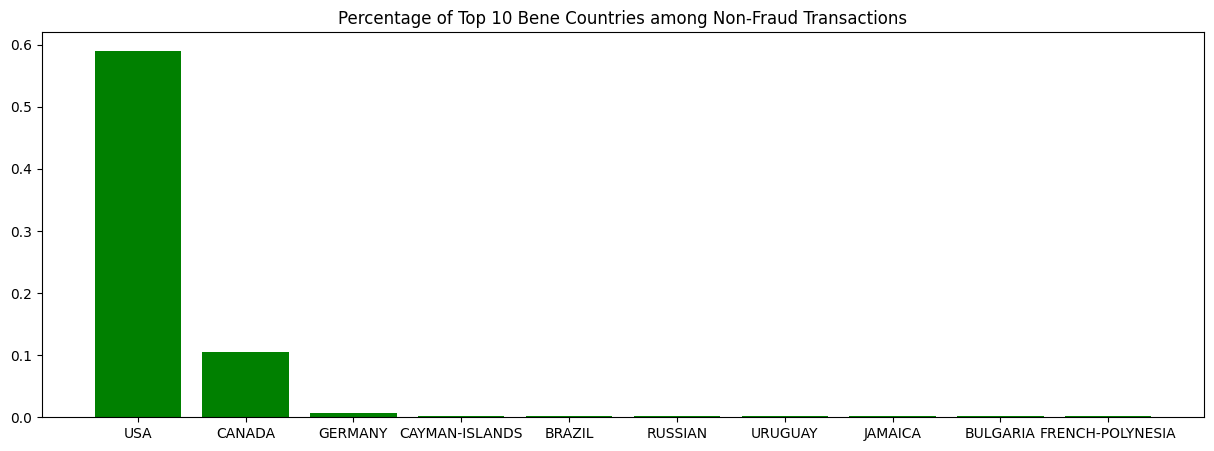

In [26]:
fig1 = plt.figure(figsize=(15,5))
plt.bar(top10beneCountry_nonfraud,nonfraud_by_bene_country.head(10)[0],color = "green")
plt.title("Percentage of Top 10 Bene Countries among Non-Fraud Transactions")
plt.show()

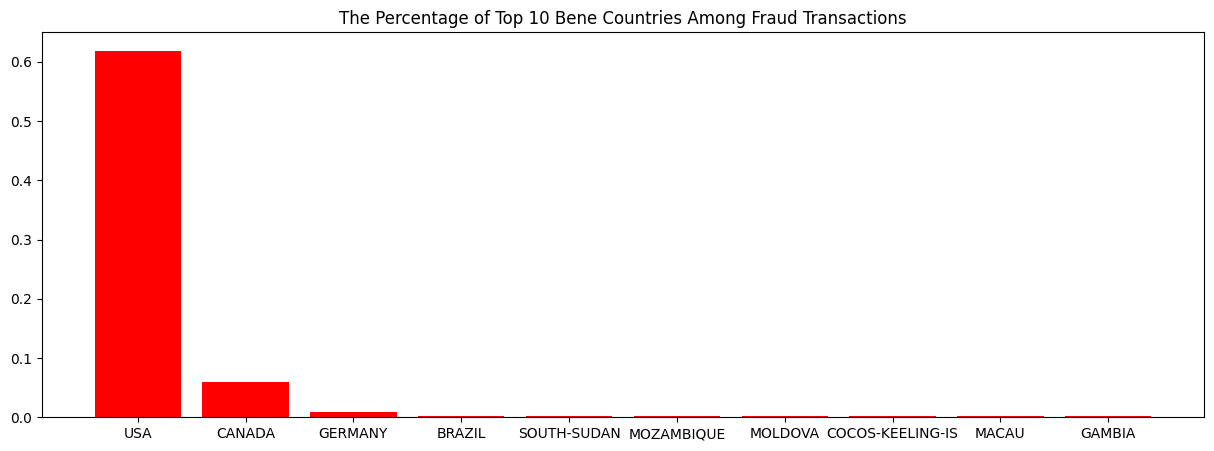

In [30]:
fig = plt.figure(figsize=(15,5))
plt.bar(top10beneCountry_fraud,fraud_by_bene_country.head(10)[0],color ="red")
plt.title("The Percentage of Top 10 Bene Countries Among Fraud Transactions")
plt.show()

Percentage of Bene Countries from USA, CANADA and BRAZIL are same in both Fraud and non-Fraud transactions. However,...........

### 2.2.1 Aggregate Two Top-10-Bene Countries from both Fraud and non-Fraud

In [16]:
topbeneCountry = []
for i in top10beneCountry_fraud:
    if i not in topbeneCountry:
        topbeneCountry.append(i)
for e in top10beneCountry_nonfraud:
    if e not in topbeneCountry:
        topbeneCountry.append(e)

In [17]:
topbeneCountry

['USA',
 'CANADA',
 'GERMANY',
 'BRAZIL',
 'SOUTH-SUDAN',
 'MOZAMBIQUE',
 'MOLDOVA',
 'COCOS-KEELING-IS',
 'MACAU',
 'GAMBIA',
 'CAYMAN-ISLANDS',
 'RUSSIAN',
 'URUGUAY',
 'JAMAICA',
 'BULGARIA',
 'FRENCH-POLYNESIA']

## 2.3 For fraud type and nonFraud, what percentage of each Sender Country? 


In [18]:
fraud_by_sender_country = jp_df.loc[(jp_df["Label"] == 1),["Sender_Country"]].value_counts(normalize = True).to_frame()

top10senderCountry_fraud = []
for i in list(fraud_by_sender_country.head(10).index):
    top10senderCountry_fraud.append(i[0])

In [19]:
nonfraud_by_sender_country = jp_df.loc[(jp_df["Label"] == 0),["Sender_Country"]].value_counts(normalize = True).to_frame()

top10senderCountry_nonfraud = []
for i in list(nonfraud_by_sender_country.head(10).index):
    top10senderCountry_nonfraud.append(i[0])

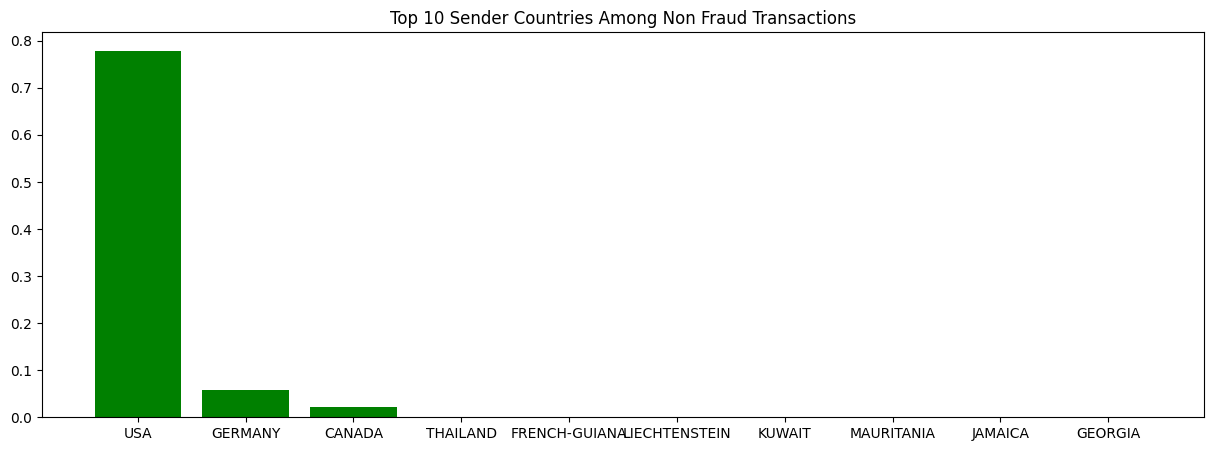

In [32]:
fig = plt.figure(figsize=(15,5))
plt.bar(top10senderCountry_nonfraud,nonfraud_by_sender_country.head(10)[0], color = 'green')
plt.title("Top 10 Sender Countries Among Non Fraud Transactions")
plt.show()

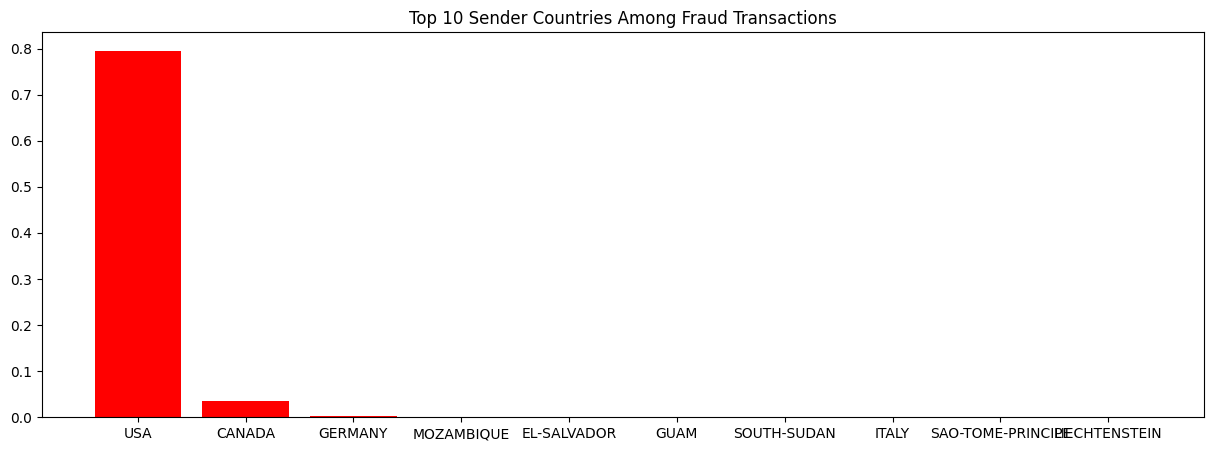

In [30]:
fig = plt.figure(figsize=(15,5))
plt.bar(top10senderCountry_fraud,fraud_by_sender_country.head(10)[0], color = "red")
plt.title("Top 10 Sender Countries Among Fraud Transactions")
plt.show()

Percentage of Sender Countries from USA and CANADA are same in both Fraud and non-Fraud transactions. However,........

### 2.3.1 Aggregate Two Top-10-Sender Countries from both Fraud and non-Fraud 

In [20]:
topsenderCountry = []
for i in top10senderCountry_fraud:
    if i not in topsenderCountry:
        topsenderCountry.append(i)
for e in top10senderCountry_nonfraud:
    if e not in topsenderCountry:
        topsenderCountry.append(e)

## 2.4 What percentage of each transaction type for fraud and non fraud?

In [24]:
print(jp_df.loc[jp_df['Label'] == 1,["Transaction_Type"]].value_counts(normalize = True))
print(jp_df.loc[jp_df['Label'] == 0,["Transaction_Type"]].value_counts(normalize = True))

Transaction_Type
QUICK-PAYMENT       0.257471
MAKE-PAYMENT        0.244752
PAY-CHECK           0.098803
MOVE-FUNDS          0.098608
DEPOSIT-CASH        0.089945
WITHDRAWAL          0.084688
EXCHANGE            0.081962
DEPOSIT-CHECK       0.043772
dtype: float64
Transaction_Type
MAKE-PAYMENT        0.374954
QUICK-PAYMENT       0.142891
MOVE-FUNDS          0.120738
DEPOSIT-CHECK       0.073689
DEPOSIT-CASH        0.072673
EXCHANGE            0.071994
WITHDRAWAL          0.071636
PAY-CHECK           0.071425
dtype: float64


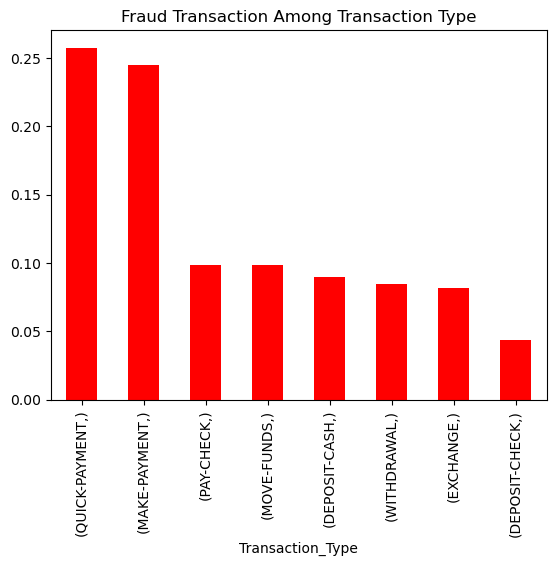

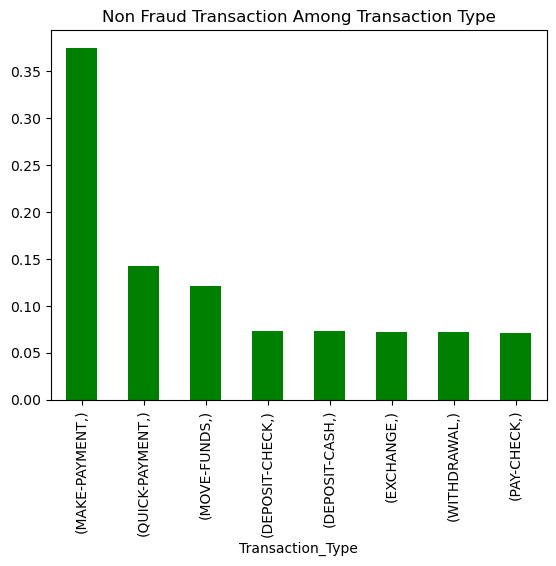

In [25]:
jp_df.loc[jp_df['Label'] == 1,["Transaction_Type"]].value_counts(normalize = True).plot.bar(color = "red")
plt.title("Fraud Transaction Among Transaction Type")
plt.show()
jp_df.loc[jp_df['Label'] == 0,["Transaction_Type"]].value_counts(normalize = True).plot.bar(color = "green")
plt.title("Non Fraud Transaction Among Transaction Type")
plt.show()

Given Fraud Transaction, the QUICK-PAYMENT (25.7%) type has the highest percent followed by MAKE-PAYMENT(24.5%) type and PAY-CHECK(10%). Given non-fraud transaction, MAKE-PAYMENT (37.%) type has the highest percent followed by QUICK-PAYMENT type(14.3%). Another standing point here is the PAY-CHECK percent among fraud transaction types has the third high, while it has the lowest among non fraud transtion. Also, the percent of QUICK-PAYMENT type among Fraud transactions is even higher than that percent in non-Fraud transactions. Therefore, we notice that most fraud transactions come from QUICK-PAYMENT, and PAY-CHECK. Even though MAKE-PAYMENT percentage in the fraud transactions is higher, it is also high in non-fraud transactions. 


In [44]:
transaction_types = list(jp_df.Transaction_Type.value_counts().index.unique())

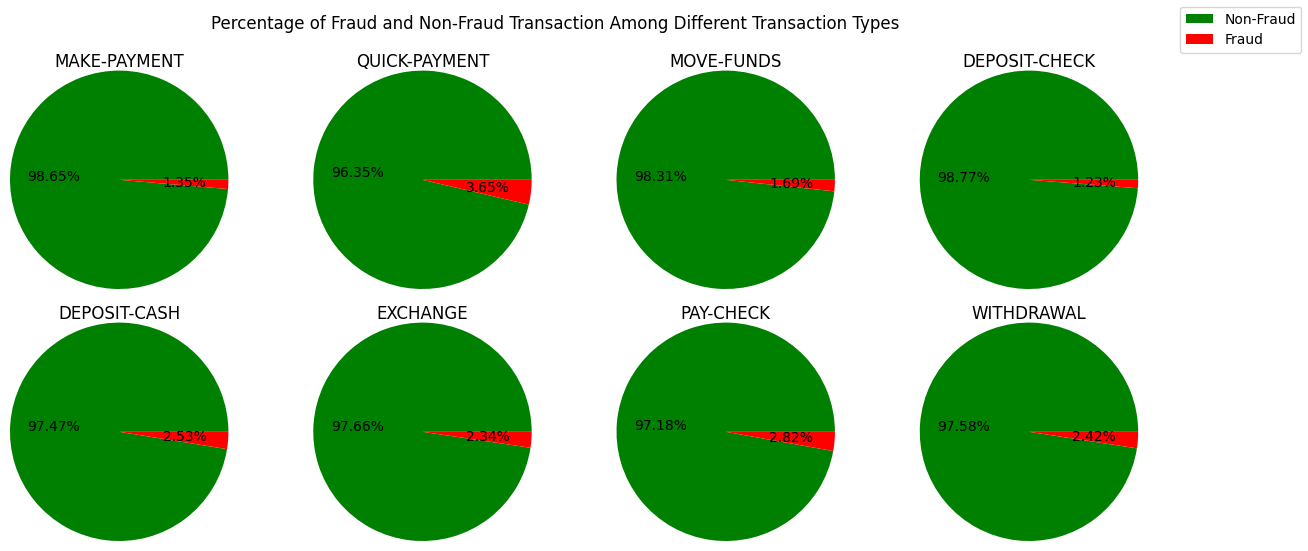

In [45]:
fig = plt.figure(figsize=(15,6))
i = 0
for t in transaction_types:
    i = i + 1
    ax = fig.add_subplot(2,4,i)
    ax.pie(jp_df.loc[jp_df["Transaction_Type"] == t,["Label"]].value_counts(normalize = True).to_list(),
           autopct='%1.2f%%', radius = 1.3, colors = ["green","red"])
    ax.set_title(t)
plt.figlegend(["Non-Fraud","Fraud"])
fig.suptitle("Percentage of Fraud and Non-Fraud Transaction Among Different Transaction Types")
plt.show()

Given each type of transaction, the percentage of fraud in the QUICK-PAYMENT is the highest(3.65%), followed by PAY-CHECK(2.82%), and DEPOSIT-CASH (2.53%). Again, we see QUICK-PAYMENT and PAY-CHECK are one of the most commons type that give higher chance of fraud. It means given the MAKE-PAYMENT or PAY-CHECK transaction type, it is more likely fraud than other types.  

### 2.5. Compare the Percentage of Fraud Between Transaction Occuring in-side-country and out-of-country

Text(0.5, 1.0, 'Percentage of Fraud and non-Fraud Transactions Within Countries')

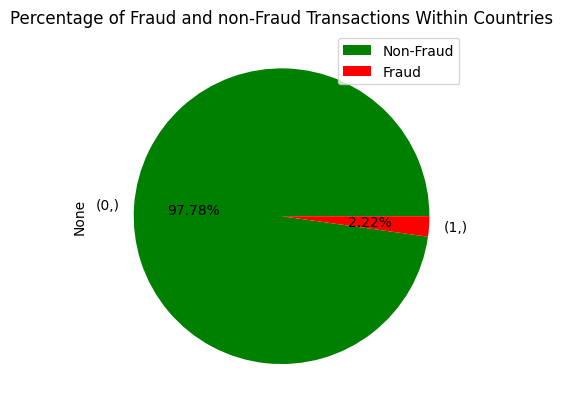

In [48]:
jp_df_copy1.loc[jp_df_copy1["Bene_Country"] == jp_df_copy1["Sender_Country"],["Label"]].value_counts(normalize=True).plot.pie(autopct='%1.2f%%',colors = ['green','red',])
plt.legend(["Non-Fraud","Fraud"])
plt.title("Percentage of Fraud and non-Fraud Transactions Within Countries")

Text(0.5, 1.0, 'Percentage of Fraud and non-Fraud Transactions Occur Between Two Different Countries')

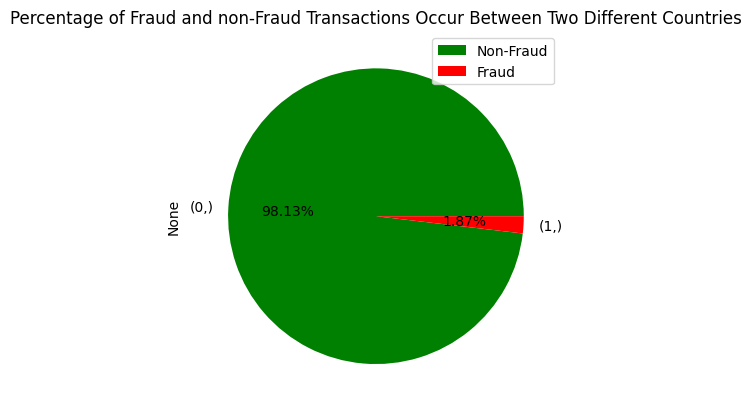

In [49]:
jp_df_copy1.loc[jp_df_copy1["Bene_Country"] != jp_df_copy1["Sender_Country"],["Label"]].value_counts(normalize=True).plot.pie(autopct='%1.2f%%',colors = ['green','red',])
plt.legend(["Non-Fraud","Fraud"])
plt.title("Percentage of Fraud and non-Fraud Transactions Occur Between Two Different Countries")

### 2.6 Compare the the percentage of transaction happen between two different countries, given either fraud or non-fraud  

In [21]:
#create new datafram named df2, which select only transaction occuring between two different countries.

df2 = jp_df.loc[(jp_df['Bene_Country'] != jp_df['Sender_Country']) & jp_df['Bene_Country'].notnull() & jp_df['Sender_Country'].notnull(),:]
df2["Sender_Bene_Pair"] = df2["Sender_Country"] + "--"+df2["Bene_Country"]

c:\Users\cindydao\OneDrive - UNT System\studying\Fall 2022\DSCI 4700\Coding\venv1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'The percentage of Fraud Transactions Occur Between Two Different Countries ')

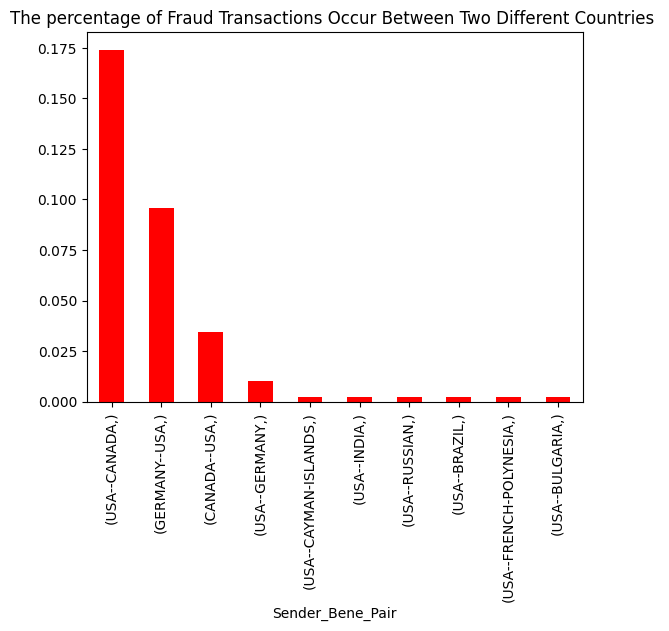

In [22]:
df2.loc[df2["Label"] == 0, ["Sender_Bene_Pair"]].value_counts(normalize=True).head(10).plot.bar(color = "red")
plt.title("The percentage of Fraud Transactions Occur Between Two Different Countries ")

Text(0.5, 1.0, 'The percentage of Non-Fraud Transactions Occur Between Two Different Countries ')

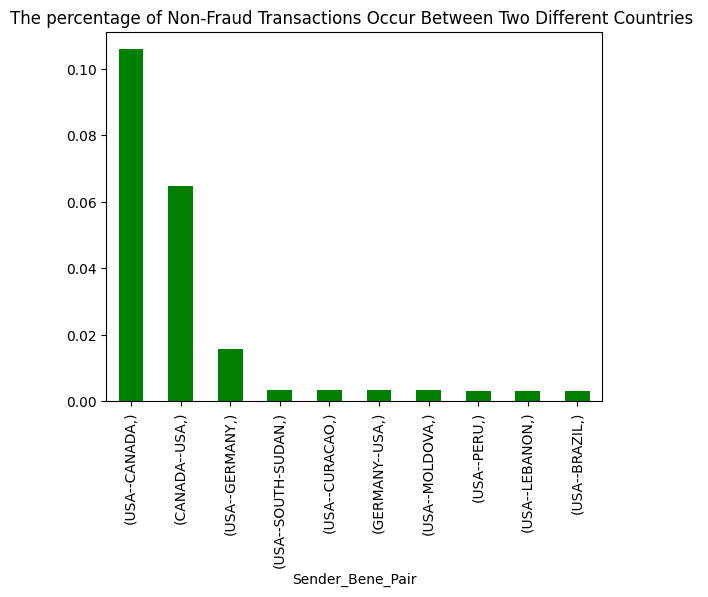

In [36]:
df2.loc[df2["Label"] == 1, ["Sender_Bene_Pair"]].value_counts(normalize=True).head(10).plot.bar(color = "green")
plt.title("The percentage of Non-Fraud Transactions Occur Between Two Different Countries ")

Among fraud transactions, the probability of the ones from USA to CAYMAN-ISLANDS, INDIA, RUSSIAN, BRAZIL are at 5th, 6th, 7th and 8th respectively, besides the top 4. 

## 3. Feature Engineering

In [29]:
# In section 1, we already replace the missing values with other values. In this section 3, we select necessary columns to build
# the models. And Transform categories variables to numeric variable

In [17]:
#Select only top bene and sender Countries. Other contries will be assigned to "other"

In [23]:
print(topbeneCountry)
print(topsenderCountry)

['USA', 'CANADA', 'GERMANY', 'BRAZIL', 'SOUTH-SUDAN', 'MOZAMBIQUE', 'MOLDOVA', 'COCOS-KEELING-IS', 'MACAU', 'GAMBIA', 'CAYMAN-ISLANDS', 'RUSSIAN', 'URUGUAY', 'JAMAICA', 'BULGARIA', 'FRENCH-POLYNESIA']
['USA', 'CANADA', 'GERMANY', 'MOZAMBIQUE', 'EL-SALVADOR', 'GUAM', 'SOUTH-SUDAN', 'ITALY', 'SAO-TOME-PRINCIPE', 'LIECHTENSTEIN', 'THAILAND', 'FRENCH-GUIANA', 'KUWAIT', 'MAURITANIA', 'JAMAICA', 'GEORGIA']


In [24]:
def assign_countries(value, top_Country):
    if value in top_Country:
        return value
    else:
        return "other"

In [25]:
jp_df_copy1["Sender_Country_Modified"] = jp_df_copy1["Sender_Country"]
jp_df_copy1["Sender_Country_Modified"]=jp_df_copy1["Sender_Country_Modified"].apply(assign_countries,top_Country = topsenderCountry)

In [26]:
jp_df_copy1["Sender_Country_Modified"].value_counts()

USA                  805501
other                580552
GERMANY               73362
CANADA                27296
FRENCH-GUIANA           996
THAILAND                985
LIECHTENSTEIN           982
MAURITANIA              973
KUWAIT                  941
JAMAICA                 919
GEORGIA                 875
EL-SALVADOR             870
MOZAMBIQUE              854
ITALY                   825
GUAM                    814
SAO-TOME-PRINCIPE       742
SOUTH-SUDAN             690
Name: Sender_Country_Modified, dtype: int64

In [27]:
jp_df_copy1["Bene_Country_Modified"] = jp_df_copy1["Bene_Country"]

jp_df_copy1["Bene_Country_Modified"]=jp_df_copy1["Bene_Country_Modified"].apply(assign_countries,top_Country = topsenderCountry)

### 3.1 Select Preditable Columns

In [28]:
selected_columns = ['Sender_Id', 
       'Sender_Country_Modified',  'Bene_Id',
        'Bene_Country_Modified', 'USD_amount', 'Label',
       'Transaction_Type']

In [29]:
new_jp_df = jp_df_copy1[selected_columns]

In [30]:
new_jp_df.head()

,Sender_Id,Sender_Country_Modified,Bene_Id,Bene_Country_Modified,USD_amount,Label,Transaction_Type
0,JPMC-CLIENT-10098-self,other,JPMC-CLIENT-10098-self,other,558.43,0,WITHDRAWAL
1,JPMC-CLIENT-10098,USA,CLIENT-10100,CANADA,622.78,0,QUICK-PAYMENT
2,JPMC-CLIENT-9812-self,other,JPMC-CLIENT-9812-self,other,802.54,0,DEPOSIT-CASH
3,JPMC-CLIENT-9812,USA,JPMC-CLIENT-9814,USA,989.09,0,PAY-CHECK
4,JPMC-CLIENT-9789-self,other,JPMC-CLIENT-9789-self,other,786.78,0,DEPOSIT-CHECK


In [66]:
#Check if there are still any missing values
#sns.heatmap(new_jp_df.isna().transpose(),
            #cmap="YlGnBu",
            #cbar_kws={'label': 'Missing Data'})

In [31]:
new_jp_df.isna().sum()

Sender_Id                  0
Sender_Country_Modified    0
Bene_Id                    0
Bene_Country_Modified      0
USD_amount                 0
Label                      0
Transaction_Type           0
dtype: int64

There are no more missing values in our new_jp_df 

### 3.2 Eliminate the digital character in the sender and bene id. 

In [83]:
#Eliminate the digital character in the id. Ex: from "CLIENT-10100" to "CLIENT"

In [126]:
print(new_jp_df.Bene_Id.unique())
print(new_jp_df.Sender_Id.unique())

['JPMC-CLIENT-10098-self' 'CLIENT-10100' 'JPMC-CLIENT-9812-self' ...
 'BILL-COMPANY-2182913' 'BILL-COMPANY-2178248' 'BILL-COMPANY-2180022']
['JPMC-CLIENT-10098-self' 'JPMC-CLIENT-10098' 'JPMC-CLIENT-9812-self' ...
 'BILL-COMPANY-2178060' 'BILL-COMPANY-2181246' 'BILL-COMPANY-2178781']


Above values are before transformed

In [32]:
#Write function to eleminate the digital character
def convert_Id(sender_id):
    try:
        if re.search(r"\-\d+",sender_id):
            eliminated_digit = re.search(r"\-\d+",sender_id).group(0)
            sender_id = sender_id.replace(eliminated_digit, "")
            return sender_id
    except:
        return sender_id
#convert sender id
sender_id = new_jp_df["Sender_Id"].apply(convert_Id)

In [33]:
bene_id = new_jp_df["Bene_Id"].apply(convert_Id)

In [129]:
print(sender_id.unique())
print(bene_id.unique())

['JPMC-CLIENT-self' 'JPMC-CLIENT' 'CLIENT' 'COMPANY' 'JPMC-COMPANY'
 'BILL-COMPANY']
['JPMC-CLIENT-self' 'CLIENT' 'JPMC-CLIENT' 'JPMC-COMPANY' 'COMPANY'
 'BILL-COMPANY']


Above are after transformed

In [35]:

new_jp_df_copy = new_jp_df.copy()
new_jp_df_copy["Sender_Id"] = sender_id
new_jp_df_copy["Bene_Id"] = bene_id

In [131]:
new_jp_df_copy.head()

,Sender_Id,Sender_Country_Modified,Bene_Id,Bene_Country_Modified,USD_amount,Label,Transaction_Type
0,JPMC-CLIENT-self,other,JPMC-CLIENT-self,other,558.43,0,WITHDRAWAL
1,JPMC-CLIENT,USA,CLIENT,CANADA,622.78,0,QUICK-PAYMENT
2,JPMC-CLIENT-self,other,JPMC-CLIENT-self,other,802.54,0,DEPOSIT-CASH
3,JPMC-CLIENT,USA,JPMC-CLIENT,USA,989.09,0,PAY-CHECK
4,JPMC-CLIENT-self,other,JPMC-CLIENT-self,other,786.78,0,DEPOSIT-CHECK


In [36]:
sender_country = new_jp_df_copy.loc[new_jp_df_copy["Sender_Country_Modified"].isnull(),['Sender_Country_Modified']]

In [37]:
bene_country = new_jp_df_copy.loc[new_jp_df_copy["Sender_Country_Modified"].isnull(),['Bene_Country_Modified']]

In [134]:
new_jp_df_copy.head()


,Sender_Id,Sender_Country_Modified,Bene_Id,Bene_Country_Modified,USD_amount,Label,Transaction_Type
0,JPMC-CLIENT-self,other,JPMC-CLIENT-self,other,558.43,0,WITHDRAWAL
1,JPMC-CLIENT,USA,CLIENT,CANADA,622.78,0,QUICK-PAYMENT
2,JPMC-CLIENT-self,other,JPMC-CLIENT-self,other,802.54,0,DEPOSIT-CASH
3,JPMC-CLIENT,USA,JPMC-CLIENT,USA,989.09,0,PAY-CHECK
4,JPMC-CLIENT-self,other,JPMC-CLIENT-self,other,786.78,0,DEPOSIT-CHECK


In [38]:
new_jp_df_copy.Bene_Country_Modified.value_counts()

other                771564
USA                  563703
CANADA               134351
GERMANY                7886
SOUTH-SUDAN            1763
JAMAICA                1713
MOZAMBIQUE             1707
LIECHTENSTEIN          1673
THAILAND               1656
GUAM                   1650
EL-SALVADOR            1583
FRENCH-GUIANA          1576
MAURITANIA             1560
GEORGIA                1519
ITALY                  1494
KUWAIT                 1405
SAO-TOME-PRINCIPE      1374
Name: Bene_Country_Modified, dtype: int64

### 3.3. Adding "sender" to values of the Sender_Id and Sender_Country Columns

In [39]:

def transform_sender_columns_values(string_values):
    if "self" not in string_values:
        new_values = string_values + "-"+"sender"
        return new_values
    else:
        return string_values

In [40]:
final_sender_id = new_jp_df_copy["Sender_Id"].apply(transform_sender_columns_values)

In [41]:
new_jp_df_copy["Sender_Id"] = final_sender_id

In [42]:
new_jp_df_copy["Sender_Id"].value_counts()

JPMC-CLIENT-sender     848168
JPMC-CLIENT-self       434779
CLIENT-sender          110608
COMPANY-sender          59204
JPMC-COMPANY-sender     25013
BILL-COMPANY-sender     20405
Name: Sender_Id, dtype: int64

In [43]:
final_sender_country = new_jp_df_copy["Sender_Country_Modified"].apply(transform_sender_columns_values)

In [44]:
new_jp_df_copy["Sender_Country_Modified"] =final_sender_country


### 3.3. Adding "bene" to values of Bene_Id and Bene_Country Columns 

In [45]:
def transform_bene_columns_values(string_values):
    if "self" not in string_values:
        new_values = string_values + "-"+"bene"
        return new_values
    else:
        return string_values

In [46]:
new_jp_df_copy["Bene_Id"] = new_jp_df_copy["Bene_Id"].apply(transform_bene_columns_values)
new_jp_df_copy["Bene_Id"].unique()

array(['JPMC-CLIENT-self', 'CLIENT-bene', 'JPMC-CLIENT-bene',
       'JPMC-COMPANY-bene', 'COMPANY-bene', 'BILL-COMPANY-bene'],
      dtype=object)

In [47]:
new_jp_df_copy["Bene_Id"]

0           JPMC-CLIENT-self
1                CLIENT-bene
2           JPMC-CLIENT-self
3           JPMC-CLIENT-bene
4           JPMC-CLIENT-self
                 ...        
1498172    BILL-COMPANY-bene
1498173          CLIENT-bene
1498174    BILL-COMPANY-bene
1498175          CLIENT-bene
1498176          CLIENT-bene
Name: Bene_Id, Length: 1498177, dtype: object

In [48]:
new_jp_df_copy["Bene_Country_Modified"] = new_jp_df_copy["Bene_Country_Modified"].apply(transform_bene_columns_values)


In [49]:
new_jp_df_copy.head()

,Sender_Id,Sender_Country_Modified,Bene_Id,Bene_Country_Modified,USD_amount,Label,Transaction_Type
0,JPMC-CLIENT-self,other-sender,JPMC-CLIENT-self,other-bene,558.43,0,WITHDRAWAL
1,JPMC-CLIENT-sender,USA-sender,CLIENT-bene,CANADA-bene,622.78,0,QUICK-PAYMENT
2,JPMC-CLIENT-self,other-sender,JPMC-CLIENT-self,other-bene,802.54,0,DEPOSIT-CASH
3,JPMC-CLIENT-sender,USA-sender,JPMC-CLIENT-bene,USA-bene,989.09,0,PAY-CHECK
4,JPMC-CLIENT-self,other-sender,JPMC-CLIENT-self,other-bene,786.78,0,DEPOSIT-CHECK


### 3.4 One-Hot-Encoding for Category Variables 

In [148]:
#Transfer All Category Variables (5) including Sender_Id, Sender_Country, Bene_Id, Bene_Country, Transaction_Type to One-hot-encoding

In [50]:
jp_df_copy2 = new_jp_df_copy.copy()

In [51]:
jp_df_copy2[["USD_amount","Label"]]

,USD_amount,Label
0,558.43,0
1,622.78,0
2,802.54,0
3,989.09,0
4,786.78,0
...,...,...
1498172,159.64,0
1498173,120.07,0
1498174,25.32,0
1498175,610.91,0


In [52]:
sender_id_unique_values = new_jp_df_copy.Sender_Id.unique()
sender_country_unique_values = new_jp_df_copy.Sender_Country_Modified.unique()
bene_id_unique_values = new_jp_df_copy.Bene_Id.unique()
bene_country_unique_values = new_jp_df_copy.Bene_Country_Modified.unique()
transaction_type = new_jp_df_copy.Transaction_Type.unique()

In [53]:
sender_id_unique_values

array(['JPMC-CLIENT-self', 'JPMC-CLIENT-sender', 'CLIENT-sender',
       'COMPANY-sender', 'JPMC-COMPANY-sender', 'BILL-COMPANY-sender'],
      dtype=object)

In [54]:
bene_id_unique_values

array(['JPMC-CLIENT-self', 'CLIENT-bene', 'JPMC-CLIENT-bene',
       'JPMC-COMPANY-bene', 'COMPANY-bene', 'BILL-COMPANY-bene'],
      dtype=object)

In [55]:
new_jp_df_copy.isnull().sum()

Sender_Id                  0
Sender_Country_Modified    0
Bene_Id                    0
Bene_Country_Modified      0
USD_amount                 0
Label                      0
Transaction_Type           0
dtype: int64

In [56]:
bene_country_with_self =[]
for i in bene_country_unique_values:
    if "self" in i:
        bene_country_with_self.append(i)
        

In [57]:
df1 = pd.get_dummies(jp_df_copy2["Sender_Id"],drop_first=True)
df1

,CLIENT-sender,COMPANY-sender,JPMC-CLIENT-self,JPMC-CLIENT-sender,JPMC-COMPANY-sender
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
1498172,0,0,0,1,0
1498173,0,0,0,1,0
1498174,0,0,0,1,0
1498175,0,0,0,1,0


In [58]:
df2 = pd.get_dummies(jp_df_copy2["Bene_Id"],drop_first=True).drop("JPMC-CLIENT-self", axis = 1)
df2

,CLIENT-bene,COMPANY-bene,JPMC-CLIENT-bene,JPMC-COMPANY-bene
0,0,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
1498172,0,0,0,0
1498173,1,0,0,0
1498174,0,0,0,0
1498175,1,0,0,0


In [59]:
df3 = pd.get_dummies(jp_df_copy2["Sender_Country_Modified"],drop_first=True)
df3

,EL-SALVADOR-sender,FRENCH-GUIANA-sender,GEORGIA-sender,GERMANY-sender,GUAM-sender,ITALY-sender,JAMAICA-sender,KUWAIT-sender,LIECHTENSTEIN-sender,MAURITANIA-sender,MOZAMBIQUE-sender,SAO-TOME-PRINCIPE-sender,SOUTH-SUDAN-sender,THAILAND-sender,USA-sender,other-sender
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1498173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1498174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1498175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [60]:
df4 = pd.get_dummies(jp_df_copy2["Bene_Country_Modified"]).drop(bene_country_with_self,axis = 1)
df4

,CANADA-bene,EL-SALVADOR-bene,FRENCH-GUIANA-bene,GEORGIA-bene,GERMANY-bene,GUAM-bene,ITALY-bene,JAMAICA-bene,KUWAIT-bene,LIECHTENSTEIN-bene,MAURITANIA-bene,MOZAMBIQUE-bene,SAO-TOME-PRINCIPE-bene,SOUTH-SUDAN-bene,THAILAND-bene,USA-bene,other-bene
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1498173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1498174,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1498175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [61]:
df5 =pd.get_dummies(jp_df_copy2["Transaction_Type"],drop_first = True)
df5

,DEPOSIT-CHECK,EXCHANGE,MAKE-PAYMENT,MOVE-FUNDS,PAY-CHECK,QUICK-PAYMENT,WITHDRAWAL
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1498172,0,0,1,0,0,0,0
1498173,0,0,0,0,0,1,0
1498174,0,0,1,0,0,0,0
1498175,0,0,0,0,0,1,0


In [62]:
final_df = pd.concat([df1,df2,df3,df4,df5,jp_df_copy2[["USD_amount","Label"]]],axis = 1)
#final_df.head()

In [ ]:
final_df.to_csv()

# 3. Split Train_Test Dataset

In [66]:

from sklearn.model_selection import train_test_split

In [63]:
X_ = final_df.loc[:,final_df.columns!= "Label"]
y_ = final_df.Label


In [64]:
x_index = list(range(len(final_df)))

In [67]:
X_train_indx, x_test_indx, Y_train, y_test = train_test_split(x_index,y_, test_size = 0.33, random_state=42)

In [71]:
train_dataset = final_df.iloc[X_train_indx]
test_dataset = final_df.iloc[x_test_indx]


In [72]:
train_dataset

,CLIENT-sender,COMPANY-sender,JPMC-CLIENT-self,JPMC-CLIENT-sender,JPMC-COMPANY-sender,CLIENT-bene,COMPANY-bene,JPMC-CLIENT-bene,JPMC-COMPANY-bene,EL-SALVADOR-sender,...,other-bene,DEPOSIT-CHECK,EXCHANGE,MAKE-PAYMENT,MOVE-FUNDS,PAY-CHECK,QUICK-PAYMENT,WITHDRAWAL,USD_amount,Label
456507,0,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,581.34,0
1341532,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,2000.00,0
1063389,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,613.75,0
1395346,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,293.82,0
896861,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,715.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,105.18,0
1414414,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,104.39,0
131932,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,823.29,0
671155,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,427.54,0


In [ ]:
#write the dataframe to csv file
train_dataset.to_csv("train_dataset.csv")


In [ ]:
test_dataset.to_csv("test_dataset.csv")
